In [6]:
import os
import sys
import shutil
import dotenv
from   dotenv import find_dotenv, load_dotenv
import matplotlib
load_dotenv(find_dotenv())
PATH_P     = os.environ['PATH_P']
os.chdir(PATH_P)
sys.path.insert(0, PATH_P)
import pandas as pd
from src.dst.outputhandler.pickle import tic,toc,pickle_save_,pickle_load
from src.dst.plots.plots import plotting_tool,retrieve_data,SeabornFig2Grid
from src.visualization.vis_LSTM_p.main import main_visualize
import  numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from src.visualization.vis_LSTM_p.main import main_visualize
from src.models.CMA_ES.CMA_ES import CMA_ES

## experiments

In [8]:
path                                  =  './models/test_shuffle/above/DEEP2/bayes_opt/'
RD                                    = retrieve_data()
data,dict_,path_best,hist             = RD.get_best_D1(path)
data['df_t_val_train']                = pd.concat([data['df_t_train'],data['df_t_val']])
AUC_v_a                               = RD.get_all(path,'AUC_v')

val_loss_a                            = RD.get_all(path,'val_f')
dict_['AUC_v']                        = data['AUC_v']

RD.print_dict(dict_)

str_list                              = data['path_o'].split('/')
data['path_o']                        = path_best
BO_vis                                = plotting_tool(dict_)

lr           : 0.0028724350328692794
time_dim     : 21
encoder      : [369, 105]
decoder      : [147]
vector       : 369
AUC_v        : 0.6782395253596555


In [9]:
def return_dict():
    dict_c = {
        'path_i'   : './models/bayes_opt/DEEP2/',
        'path_save': './models/CMA_ES/DEEP2/',

        'resolution_AUC': 1000,

        ###### CMA_ES    ######
        'CMA_ES': True,
        'verbose_CMA': 1,
        'verbose_CMA_log': 0,
        'evals': 21*150,
        'bounds': [-100., 100.],
        'sigma': 0.4222222222222225,
        'progress_ST': 0.3,
        'popsize'    : 21,
        
        'mode'       : 'linear',

        'epoch': 0

    }

    return dict_c

## plus min sigmoid

In [26]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_sigmoid')
# CMA_ES(dict_c).main(data,path,dict_)

In [27]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

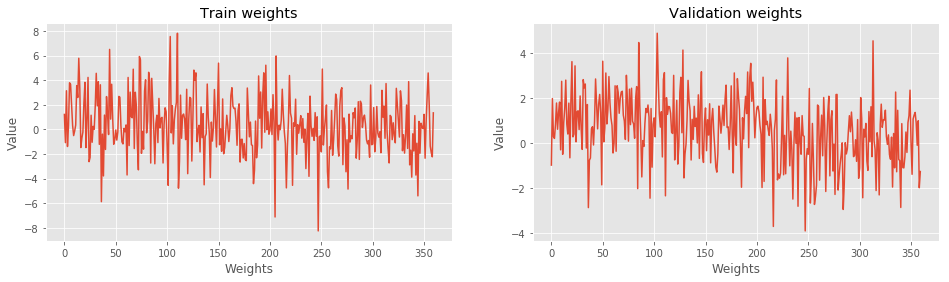

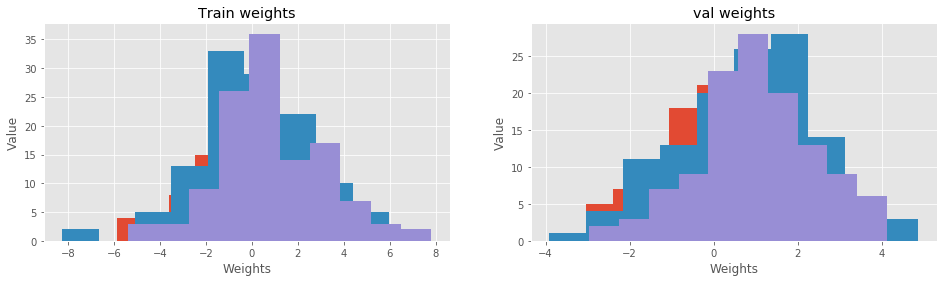

In [28]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

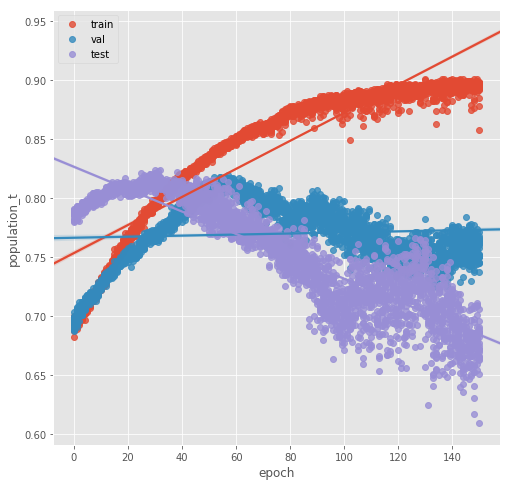

In [29]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

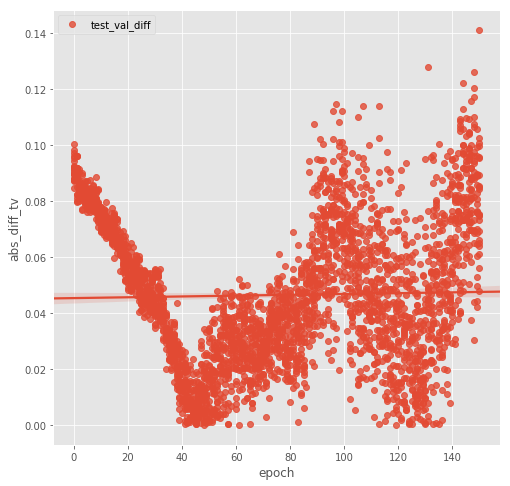

In [30]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

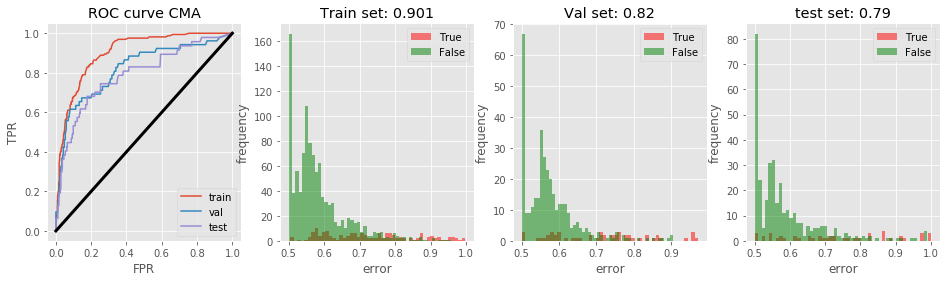

In [31]:
BO_vis.plot_cma(data)

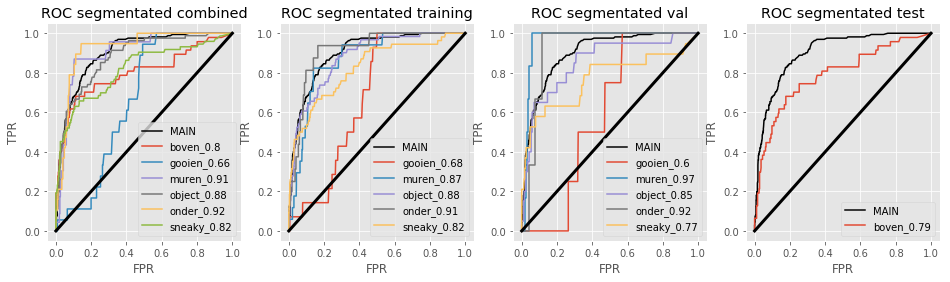

In [32]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

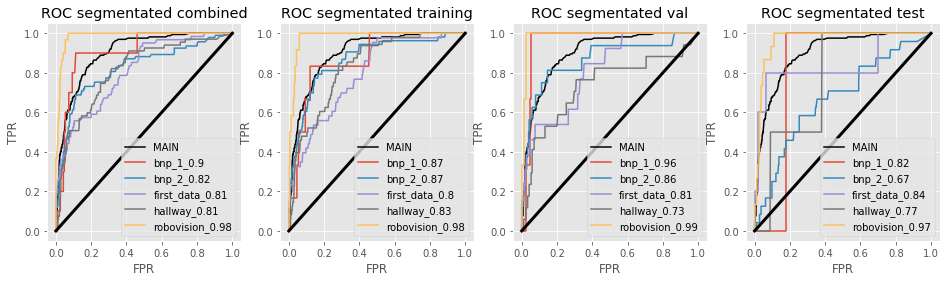

In [33]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus sigmoid

In [34]:
dict_c = return_dict()
dict_c['mode']   = 'sigmoid'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_sigmoid')
# CMA_ES(dict_c).main(data,path,dict_)

In [35]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

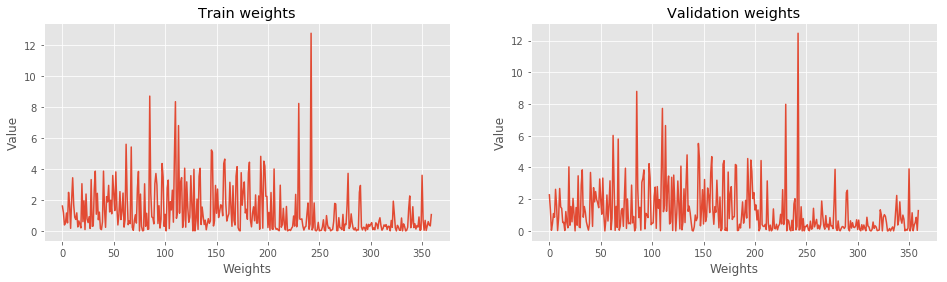

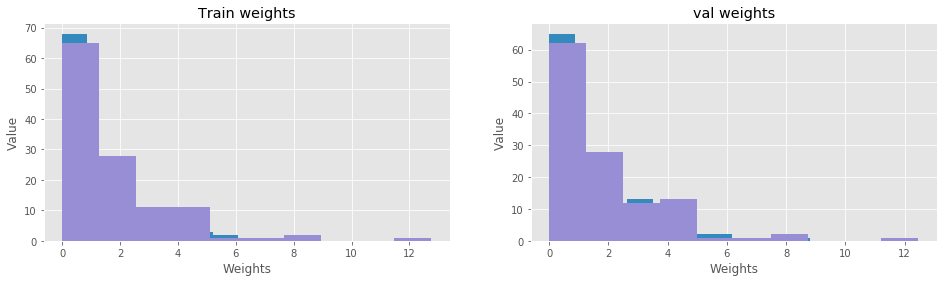

In [36]:
BO_vis.plot_weigths(data['x_tr'],data['x_v'])

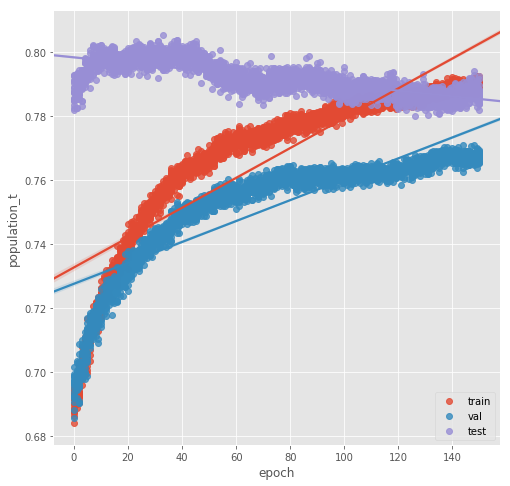

In [37]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

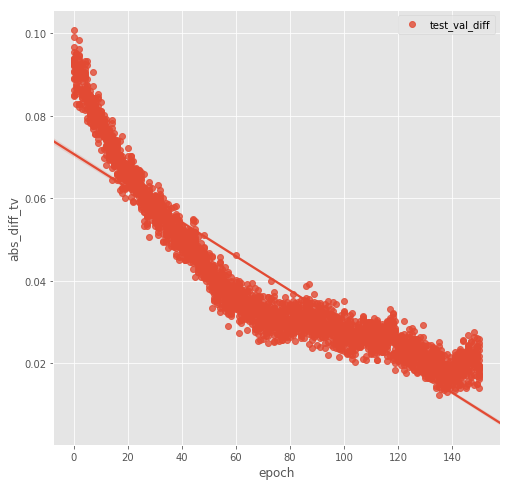

In [38]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

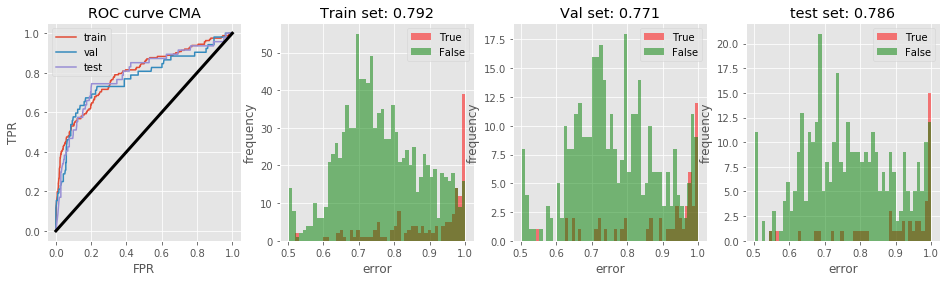

In [39]:
BO_vis.plot_cma(data)

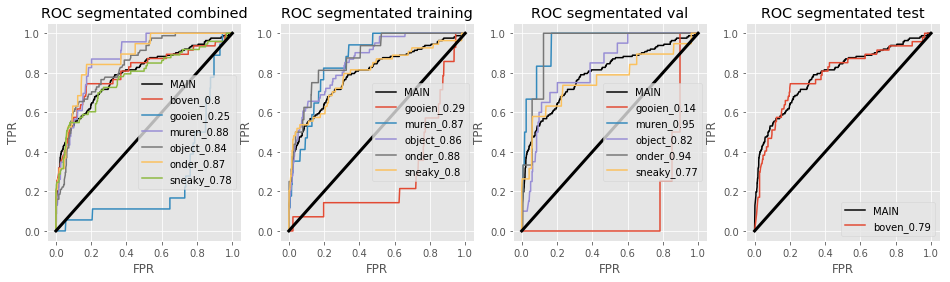

In [40]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

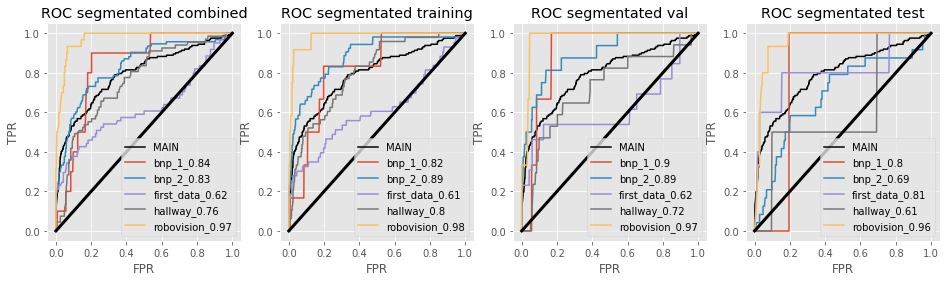

In [41]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus leaky relu

In [42]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu'
dict_c['bounds'] = [0,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_leaky_relu')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=433874, Thu Jun  7 16:10:53 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -6.994883876704893e-01 1.0e+00 4.15e-01  4e-01  4e-01 0:37.3
    2     42 -7.032013304230329e-01 1.0e+00 4.09e-01  4e-01  4e-01 0:44.5
    3     63 -7.063657046507061e-01 1.0e+00 4.03e-01  4e-01  4e-01 0:51.7
    4     84 -7.082164016214531e-01 1.0e+00 3.98e-01  4e-01  4e-01 0:58.4
    5    105 -7.142333321784523e-01 1.0e+00 3.93e-01  4e-01  4e-01 1:06.7
    6    126 -7.165402071856702e-01 1.0e+00 3.89e-01  4e-01  4e-01 1:16.8
    7    147 -7.180848606635946e-01 1.0e+00 3.85e-01  4e-01  4e-01 1:26.4
    8    168 -7.207122151774474e-01 1.0e+00 3.81e-01  4e-01  4e-01 1:34.3
    9    189 -7.226004457841065e-01 1.0e+00 3.78e-01  4e-01  4e-01 1:43.8
   10    210 -7.248264791139754e-01 1.0e+00 3.75e-01  4e-01  4e-01 1:51.5
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.275346

  100   2100 -7.861160193558072e-01 1.2e+00 3.63e-01  4e-01  4e-01 29:41.6
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -7.856540669138112e-01 1.2e+00 3.63e-01  4e-01  4e-01 30:49.8
  102   2142 -7.848369885320305e-01 1.2e+00 3.63e-01  4e-01  4e-01 31:04.3
  103   2163 -7.852816177574519e-01 1.2e+00 3.63e-01  4e-01  4e-01 31:20.8
  104   2184 -7.846406587441823e-01 1.2e+00 3.63e-01  4e-01  4e-01 31:34.9
  105   2205 -7.843750360900344e-01 1.2e+00 3.63e-01  4e-01  4e-01 31:48.3
  106   2226 -7.847215004215315e-01 1.2e+00 3.63e-01  4e-01  4e-01 31:59.7
  107   2247 -7.844270057397591e-01 1.2e+00 3.63e-01  4e-01  4e-01 32:12.9
  108   2268 -7.835492960999665e-01 1.2e+00 3.63e-01  4e-01  4e-01 32:26.4
  109   2289 -7.844270057397591e-01 1.2e+00 3.63e-01  4e-01  4e-01 32:41.7
  110   2310 -7.859225767707214e-01 1.2e+00 3.63e-01  4e-01  4e-01 32:57.9
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -7.847215004215315

In [43]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

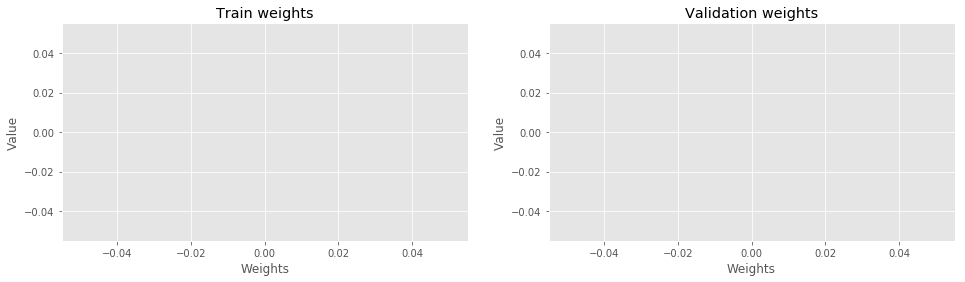

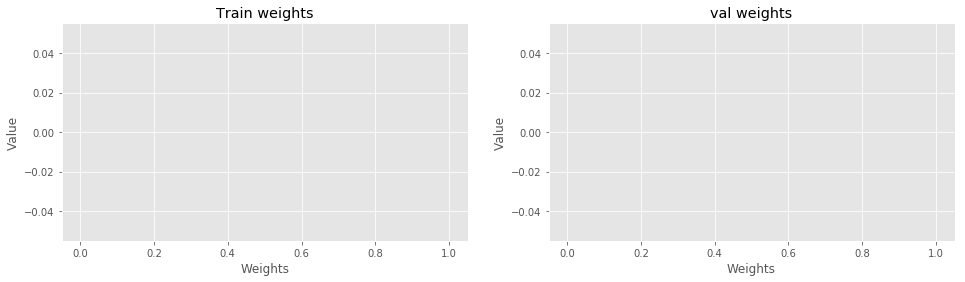

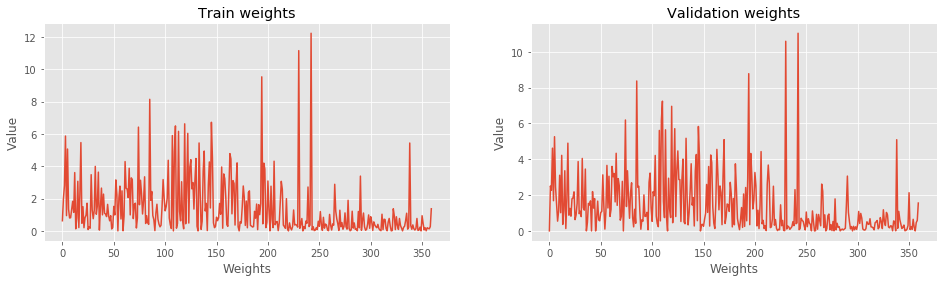

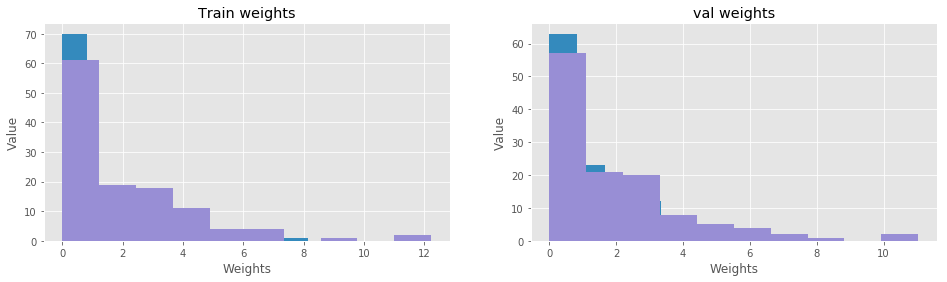

In [44]:
BO_vis.plot_weigths(data['x_tr'][360:],data['x_v'][360:])
BO_vis.plot_weigths(data['x_tr'][:360],data['x_v'][:360])

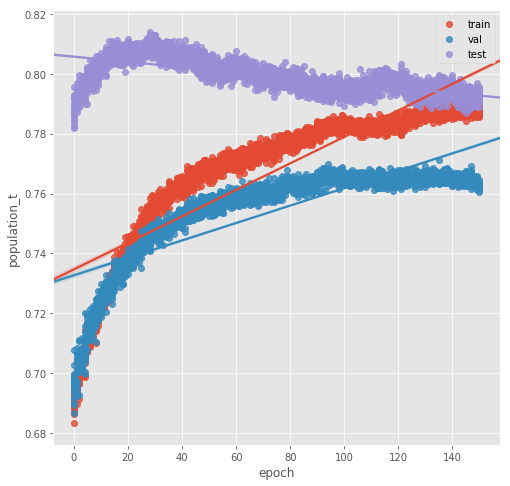

In [45]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

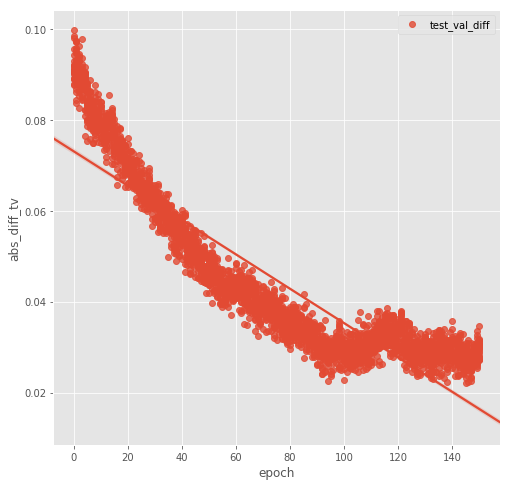

In [46]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

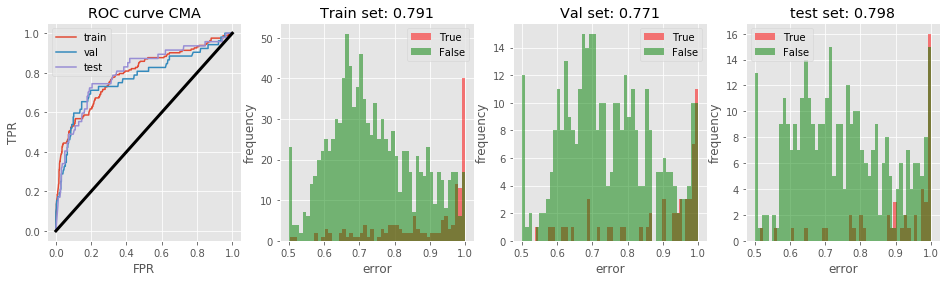

In [47]:
BO_vis.plot_cma(data)

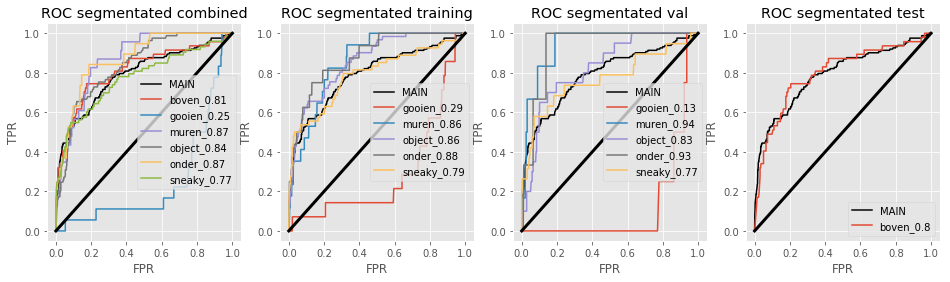

In [48]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

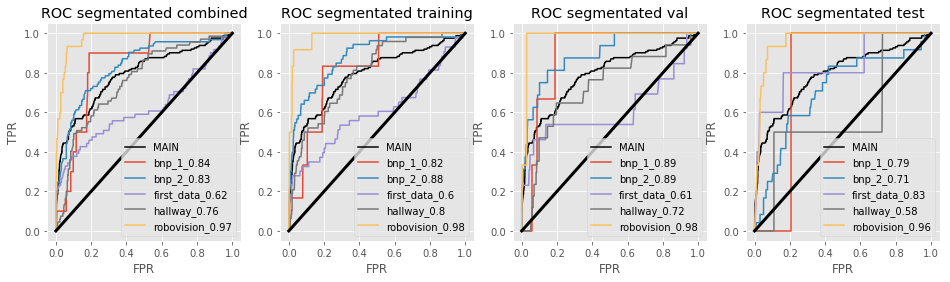

In [49]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

## plus min leaky relu

In [50]:
dict_c = return_dict()
dict_c['mode']   = 'leaky_relu'
dict_c['bounds'] = [-100,100]
path   = path_best.replace('bayes_opt','CMA_ES/pos_min_leaky_relu')
CMA_ES(dict_c).main(data,path,dict_)

(10_w,21)-aCMA-ES (mu_w=6.2,w_1=27%) in dimension 360 (seed=534333, Thu Jun  7 16:59:35 2018)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     21 -7.014978807931723e-01 1.0e+00 4.15e-01  4e-01  4e-01 1:24.6
    2     42 -7.031262631512086e-01 1.0e+00 4.09e-01  4e-01  4e-01 1:40.9
    3     63 -7.083809721789143e-01 1.0e+00 4.03e-01  4e-01  4e-01 1:54.9
    4     84 -7.108466433380684e-01 1.0e+00 3.98e-01  4e-01  4e-01 2:14.9
    5    105 -7.130380302347873e-01 1.0e+00 3.93e-01  4e-01  4e-01 2:32.8
    6    126 -7.168895587199298e-01 1.0e+00 3.89e-01  4e-01  4e-01 2:49.4
    7    147 -7.208710113293836e-01 1.0e+00 3.85e-01  4e-01  4e-01 3:04.8
    8    168 -7.240007391239073e-01 1.0e+00 3.81e-01  4e-01  4e-01 3:22.8
    9    189 -7.271651133515805e-01 1.0e+00 3.78e-01  4e-01  4e-01 3:41.7
   10    210 -7.328702260102323e-01 1.0e+00 3.75e-01  4e-01  4e-01 4:03.7
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
   11    231 -7.322581

  100   2100 -8.880227280601464e-01 1.2e+00 5.07e-01  5e-01  5e-01 39:57.9
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  101   2121 -8.865820138816709e-01 1.2e+00 5.09e-01  5e-01  5e-01 41:31.9
  102   2142 -8.909590132695840e-01 1.2e+00 5.11e-01  5e-01  5e-01 41:47.1
  103   2163 -8.887734007783900e-01 1.2e+00 5.12e-01  5e-01  5e-01 42:02.3
  104   2184 -8.889899409855756e-01 1.2e+00 5.14e-01  5e-01  5e-01 42:19.1
  105   2205 -8.897348392982942e-01 1.2e+00 5.16e-01  5e-01  5e-01 42:38.0
  106   2226 -8.914411761309172e-01 1.2e+00 5.17e-01  5e-01  5e-01 42:55.3
  107   2247 -8.894374574137591e-01 1.2e+00 5.19e-01  5e-01  5e-01 43:13.5
  108   2268 -8.916403931215280e-01 1.2e+00 5.20e-01  5e-01  5e-01 43:31.8
  109   2289 -8.895067502800588e-01 1.2e+00 5.21e-01  5e-01  5e-01 43:49.7
  110   2310 -8.927404173740314e-01 1.2e+00 5.23e-01  5e-01  5e-01 44:01.4
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
  111   2331 -8.931994826132651

In [51]:
df    = pickle_load(path+'best/df.p', None)
data  = pickle_load(path+'best/data_best.p', None)
dict_ = pickle_load(path+'dict.p', None)

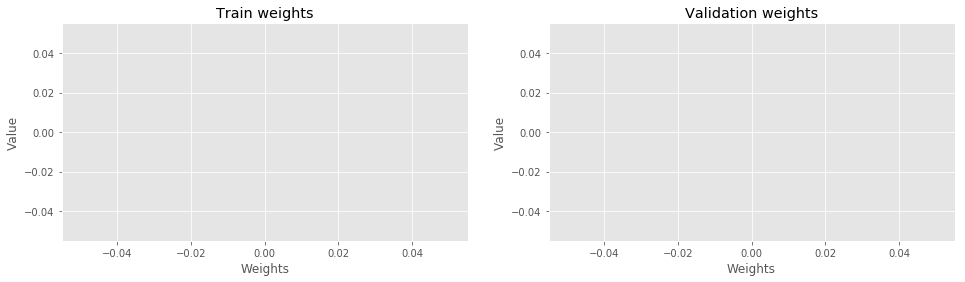

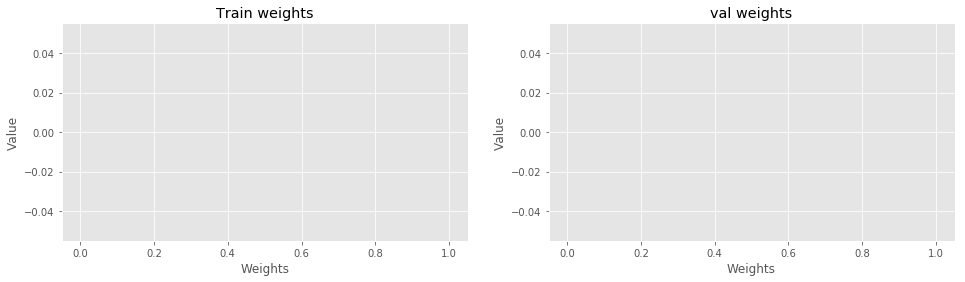

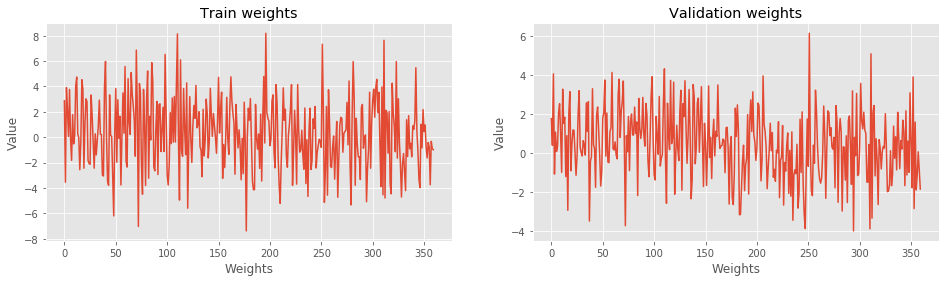

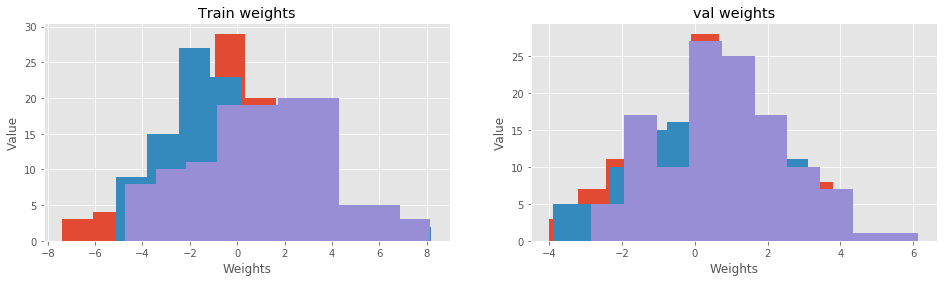

In [52]:
BO_vis.plot_weigths(data['x_tr'][360:],data['x_v'][360:])
BO_vis.plot_weigths(data['x_tr'][:360],data['x_v'][:360])

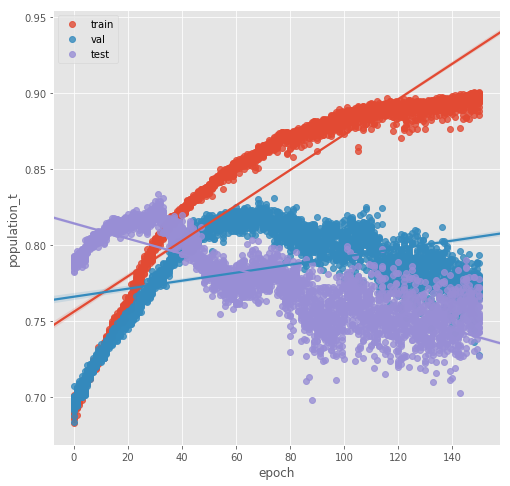

In [53]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()

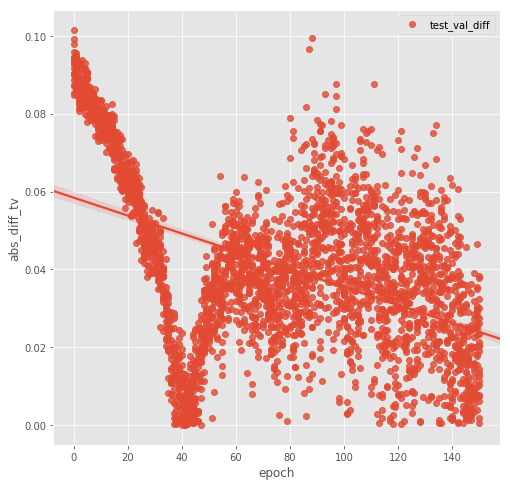

In [54]:
f, ax = plt.subplots(figsize=(8, 8))
ax = sns.regplot(df.epoch, df.abs_diff_tv,label = 'test_val_diff')
plt.legend()

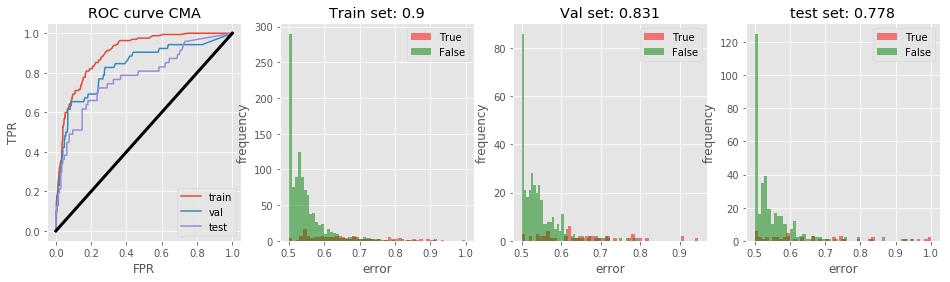

In [55]:
BO_vis.plot_cma(data)

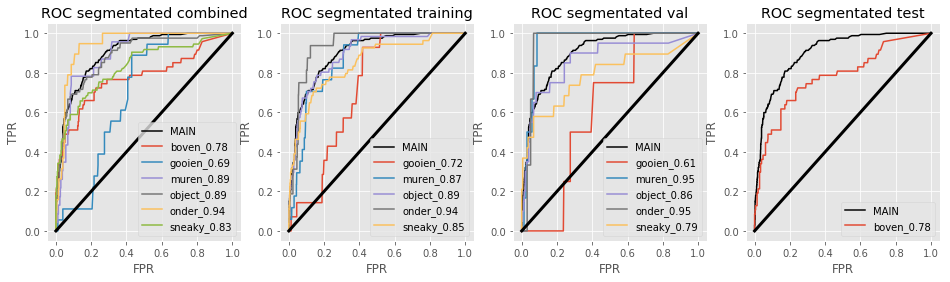

In [56]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'segmentation',cma = True)

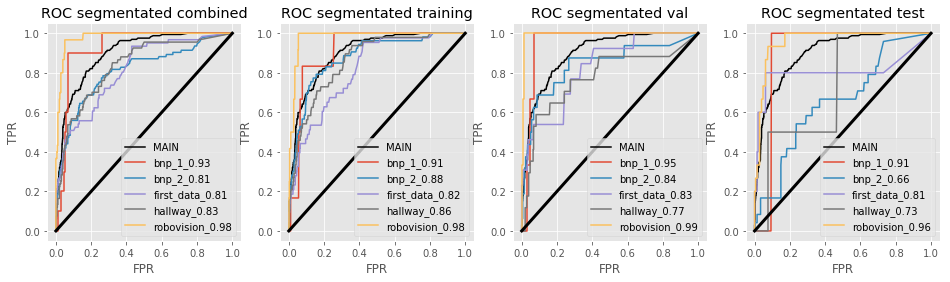

In [57]:
data['path_o'] = data['dict_config']['path_save']
BO_vis.save_ROC_segment(data,'location',cma = True)

# DEEP2

In [58]:
# path                                  =  './models/CMA_ES/DEEP2/'
# path_a                                = [path]
# RD                                    = retrieve_data()
# df,dict_,path_best                    = RD.get_max_CMA(path)


# BO_vis                                = plotting_tool(dict_['dict_config'])

# df                                     = df[df['epoch'] < 150]
# array_AUC_tr_a                         = RD.get_all_cma(path_a,'AUC_tr')
# array_AUC_v_a                          = RD.get_all_cma(path_a,'AUC_v')
# array_AUC_t_a                          = RD.get_all_cma(path_a,'AUC_t')

NameError: name 'array_AUC_tr_a' is not defined

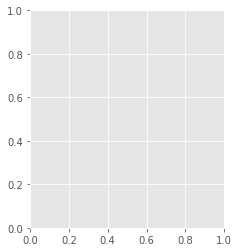

In [59]:
fig = plt.figure(figsize=(16,4))

ax1 = plt.subplot(141)
ax1 = plt.hist(array_AUC_tr_a)

ax2 = plt.subplot(142)
ax2 = plt.hist(array_AUC_v_a)

ax3 = plt.subplot(143)
ax3 = plt.hist(array_AUC_t_a)


ax4 = plt.subplot(144)
ax4 = plt.plot(array_AUC_tr_a,label = 'train')
ax4 = plt.plot(array_AUC_v_a,label = 'val')
ax4 = plt.plot(array_AUC_t_a,label = 'test')
plt.legend()
plt.show()


In [ ]:
BO_vis.plot_weigths(dict_['x_tr'],dict_['x_v'])

In [ ]:
# Set up the figure
f, ax = plt.subplots(figsize=(8, 8))



ax = sns.regplot(df.epoch, df.population_tr,label = 'train')
ax = sns.regplot(df.epoch, df.population_v,label = 'val')
ax = sns.regplot(df.epoch, df.population_t,label = 'test')
plt.legend()
plt.savefig('./plots/pic/CMA_training')

In [ ]:
BO_vis.plot_cma(dict_)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'segmentation',cma = True)

In [ ]:
dict_['path_o'] = dict_['dict_config']['path_save']
BO_vis.save_ROC_segment(dict_,'location',cma = True)

In [ ]:
dict_c = {
        'path'       :  path_best+'/',
        'mode'       : 'df_t_train',

        'path_dict'  : path_best+'/dict.p',

        'plot_mode'  : 'error'


}
vis = main_visualize(dict_c)
vis.play_videos()


In [ ]:
path_best+'/dict.p'